# Sentimental Analysis of IMDb review.
### Analyzing the reviews and sentiments OF them 
![imdb](https://static.amazon.jobs/teams/53/images/IMDb_Header_Page.jpg?1501027252)

# Basic terminologies.
### What is IMDb?
IMDb is an online database of information related to films, television series, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews.

### What is sentimental analysis?
Sentiment analysis is analytical technique that uses statistics, natural language processing, and machine learning to determine the emotional meaning of communications.

# End Goal:
End goal of this project is to analyze the IMDb reviews and predit the sentiments regarding the reviews. As the data is in the text format and our main task is:
- Understanding the data 
- Analyzing and cleaning the data with the help of NLP text cleaning techniques.
- Build a AI/ML model that can predict the sentiments based on reviews on the IMDb


# Description of Dataset
MDB dataset having 50K movie reviews for natural language processing or Text analytics. This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. It consists of a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So,we have to predict the number of positive and negative reviews using either classification or deep learning algorithms.

## Loading necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import re, string, unicodedata
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense, Input, Bidirectional, Dropout

from tensorflow.keras.models import Model
import transformers

In [2]:
# Importing the dataet
df = pd.read_csv('../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Exploratory Data Analysis, text cleaning, and Visualization

In [3]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


<AxesSubplot:xlabel='sentiment', ylabel='count'>

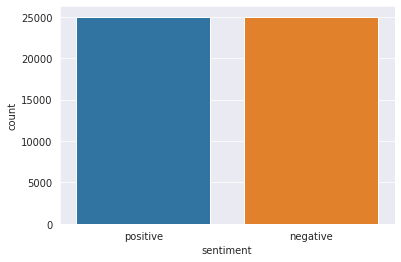

In [4]:
sns.set_style('darkgrid')
sns.countplot(df.sentiment)

- Dataset is balanced

In [5]:
df.isna().sum() # checking for any missing values

review       0
sentiment    0
dtype: int64

## Text Cleaning

StopWords:

Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc. Such words are already captured this in corpus named corpus. We first download it to our python environment.


In [6]:
stop = set(stopwords.words('english'))
punctuations = list(string.punctuation)
stop.update(punctuations)

## Basic Text Cleaning

In [7]:
# picking random text form review column
sample_text = df.review[8]
sample_text

"Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). The film looks cheap and nasty and is boring in the extreme. Rarely have I been so happy to see the end credits of a film. <br /><br />The only thing that prevents me giving this a 1-score is Harvey Keitel - while this is far from his best performance he at least seems to be making a bit of an effort. One for Keitel obsessives only."

In [8]:
# Removing HTML
soup = BeautifulSoup(sample_text, "html.parser")
sample_text = soup.get_text()
print(sample_text)

Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). The film looks cheap and nasty and is boring in the extreme. Rarely have I been so happy to see the end credits of a film. The only thing that prevents me giving this a 1-score is Harvey Keitel - while this is far from his best performance he at least seems to be making a bit of an effort. One for Keitel obsessives only.


In [9]:
# Replacing sepcial characters and symbols, non-alphabets with sapces
sample_text = re.sub('\[[^]]*\]',' ',sample_text)
sample_text = sample_text.lower() # converting text into lowercase
print(sample_text)

encouraged by the positive comments about this film on here i was looking forward to watching this film. bad mistake. i've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). the film looks cheap and nasty and is boring in the extreme. rarely have i been so happy to see the end credits of a film. the only thing that prevents me giving this a 1-score is harvey keitel - while this is far from his best performance he at least seems to be making a bit of an effort. one for keitel obsessives only.


In [10]:
sample_text = re.sub('[^a-zA-Z]',' ',sample_text)
print(sample_text)

encouraged by the positive comments about this film on here i was looking forward to watching this film  bad mistake  i ve seen      films and this is truly one of the worst of them   it s awful in almost every way  editing  pacing  storyline   acting   soundtrack  the film s only song   a lame country tune   is played no less than four times   the film looks cheap and nasty and is boring in the extreme  rarely have i been so happy to see the end credits of a film  the only thing that prevents me giving this a   score is harvey keitel   while this is far from his best performance he at least seems to be making a bit of an effort  one for keitel obsessives only 


In [11]:
# Removing stop words
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

sample_text = nltk.word_tokenize(sample_text)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
sample_text = [word for word in sample_text if not word in set(stopwords.words("english"))]

In [13]:
sample_text

['encouraged',
 'positive',
 'comments',
 'film',
 'looking',
 'forward',
 'watching',
 'film',
 'bad',
 'mistake',
 'seen',
 'films',
 'truly',
 'one',
 'worst',
 'awful',
 'almost',
 'every',
 'way',
 'editing',
 'pacing',
 'storyline',
 'acting',
 'soundtrack',
 'film',
 'song',
 'lame',
 'country',
 'tune',
 'played',
 'less',
 'four',
 'times',
 'film',
 'looks',
 'cheap',
 'nasty',
 'boring',
 'extreme',
 'rarely',
 'happy',
 'see',
 'end',
 'credits',
 'film',
 'thing',
 'prevents',
 'giving',
 'score',
 'harvey',
 'keitel',
 'far',
 'best',
 'performance',
 'least',
 'seems',
 'making',
 'bit',
 'effort',
 'one',
 'keitel',
 'obsessives']

- Like that we will apply this techniques to text data but we will not use tokenizer because the text analysis task is remaining.

## Cleaning the data 

In [14]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

# Applying function on review column
df['review'] = df['review'].apply(denoise_text)

In [15]:
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ex...,positive
1,wonderful little filming technique fashion giv...,positive
2,thought wonderful way spend time hot summer si...,positive
3,basically family little boy thinks zombie clos...,negative
4,petter time visually stunning film mattei offe...,positive


In [16]:
# Converting sentiment column in numbers(i.e, 0s or 1s)

df.sentiment.replace("positive",1,inplace=True)
df.sentiment.replace("negative",0,inplace=True)

df.head(10)

,review,sentiment
0,one reviewers mentioned watching oz episode ex...,1
1,wonderful little filming technique fashion giv...,1
2,thought wonderful way spend time hot summer si...,1
3,basically family little boy thinks zombie clos...,0
4,petter time visually stunning film mattei offe...,1
5,probably favorite story sacrifice dedication n...,1
6,sure would like see resurrection dated seahunt...,1
7,show fresh innovative idea first first years t...,0
8,encouraged positive comments film looking forw...,0
9,like original gut wrenching laughter like youn...,1


## Visulization

- WordCloud for postive and negatice texts

In [17]:
sns.set_style("whitegrid")

### WordCloud for Positive text

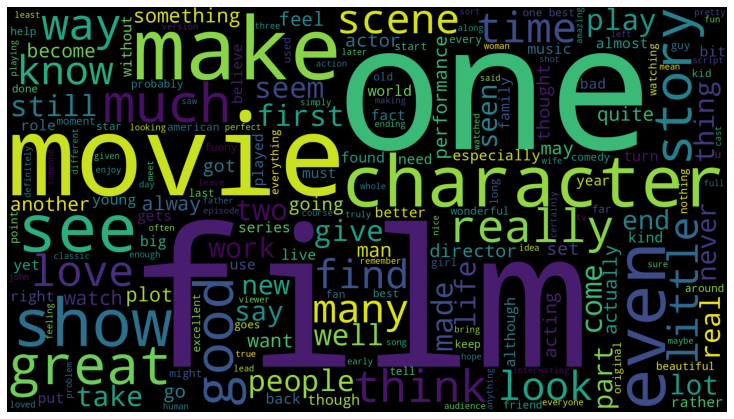

In [18]:
wordcloud = WordCloud(width=1920,height=1080).generate(" ".join(df[df.sentiment==1].review))
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### WordCloud for negative text

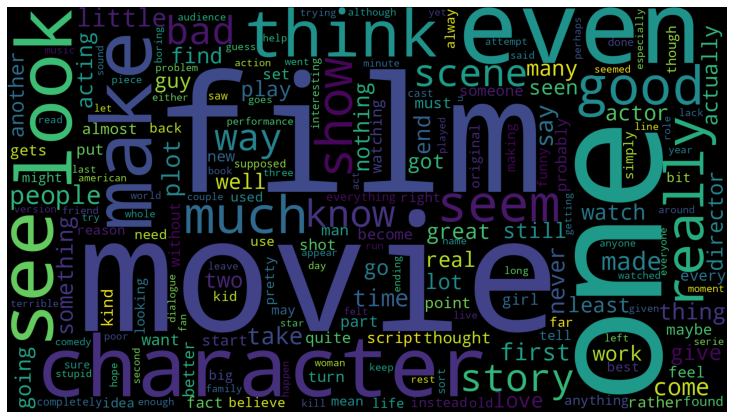

In [19]:
wordcloud = WordCloud(width=1920,height=1080).generate(" ".join(df[df.sentiment==0].review))
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Number of characters in texts

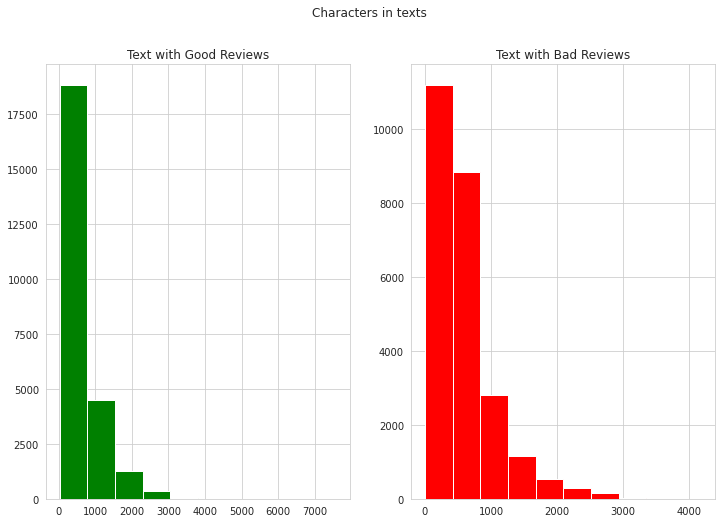

In [20]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['sentiment']==1]['review'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Text with Good Reviews')
text_len=df[df['sentiment']==0]['review'].str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Characters in texts')
plt.show()

## Number of words in each text

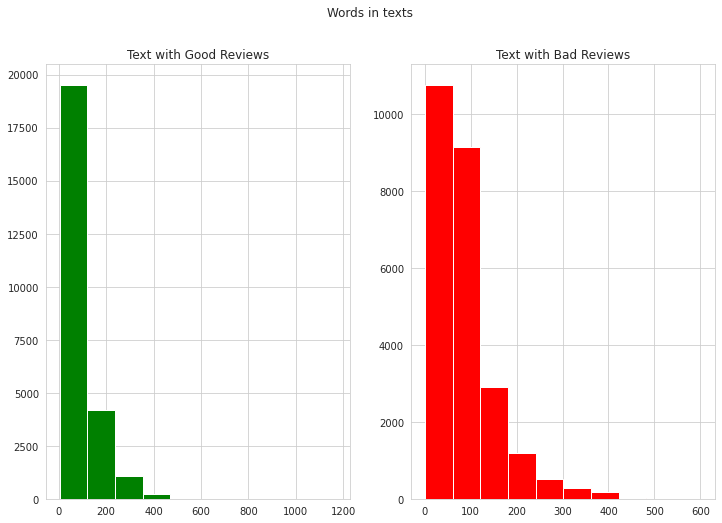

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['sentiment']==1]['review'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Text with Good Reviews')
text_len=df[df['sentiment']==0]['review'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Words in texts')
plt.show()

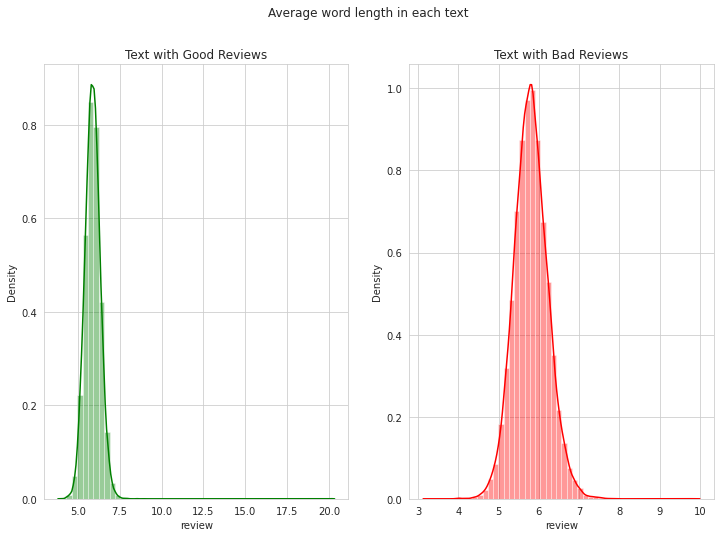

In [22]:
## Average word lenght in a text
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
word=df[df['sentiment']==1]['review'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('Text with Good Reviews')
word=df[df['sentiment']==0]['review'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Average word length in each text')
plt.show()

## Analyzing words 

In [23]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.review)
corpus[:5]

['one', 'reviewers', 'mentioned', 'watching', 'oz']

##### Most common words

In [24]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'movie': 61496,
 'film': 55088,
 'one': 45067,
 'like': 37303,
 'would': 23815,
 'even': 23720,
 'good': 23475,
 'really': 21806,
 'see': 20906,
 'get': 17692}

In [25]:
# function: text, number of records, unigram/bigram/trigram
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g,g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return word_freq[:n]

#### Unigram(single word)

In [26]:
most_common_uni = get_top_text_ngrams(df.review,20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words",title="Common Word in Text",orientation='h',width=700,height=700,color='Common_words')
fig.show()

#### Bigram(two words)

In [27]:
most_common_bi = get_top_text_ngrams(df.review,20,2)
most_common_bi = dict(most_common_bi)
temp = pd.DataFrame(columns = ["Common_words", "Count"])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())
fig = px.bar(temp, x="Count", y="Common_words",title="Common Bigrams in Text",orientation='h',width=700,height=700,color='Common_words')
fig.show()

#### Trigram(Three Words)

In [28]:
most_common_tri = get_top_text_ngrams(df.review,20,3)
most_common_tri = dict(most_common_tri)
temp = pd.DataFrame(columns = ["Common_words", "Count"])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())
fig = px.bar(temp, x="Count", y="Common_words",title="Common Trigrams in Text",orientation='h',width=700,height=700,color='Common_words')
fig.show()

# BERT 

### BERT relies on a Transformer (the attention mechanism that learns contextual relationships between words in a text). A basic Transformer consists of an encoder to read the text input and a decoder to produce a prediction for the task. Since BERT’s goal is to generate a language representation model, it only needs the encoder part. The input to the encoder for BERT is a sequence of tokens, which are first converted into vectors and then processed in the neural network. But before processing can start, BERT needs the input to be massaged and decorated with some extra metadata:

### 1. Token embeddings: A [CLS] token is added to the input word tokens at the beginning of the first sentence and a [SEP] token is inserted at the end of each sentence.

### 2. Segment embeddings: A marker indicating Sentence A or Sentence B is added to each token. This allows the encoder to distinguish between sentences.

### 3. Positional embeddings: A positional embedding is added to each token to indicate its position in the sentence.

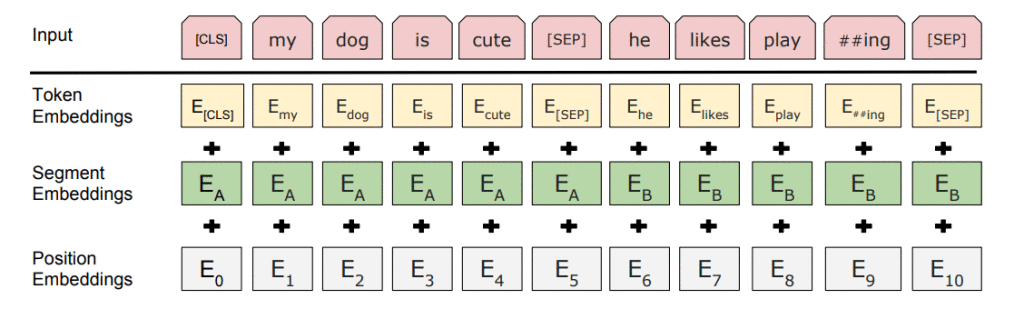

## Training the Model

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.review, df.sentiment, random_state=0, stratify=df.sentiment)

#### Fast Encoding

In [30]:
from tokenizers import BertWordPieceTokenizer
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-uncased',lower=True)
# Save lodaded tokenizer 
tokenizer.save_pretrained('.')
# Reload it with the huggingface tokenizer library
fast_tokenizer = BertWordPieceTokenizer('./vocab.txt',lowercase=True)
fast_tokenizer

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Tokenizer(vocabulary_size=30522, model=BertWordPiece, unk_token=[UNK], sep_token=[SEP], cls_token=[CLS], pad_token=[PAD], mask_token=[MASK], clean_text=True, handle_chinese_chars=True, strip_accents=None, lowercase=True, wordpieces_prefix=##)

In [ ]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=400):
    tokenizer.enable_truncate(max_lenght = maxlen)
    tokenizer.enable_padding(max_lenght=maxlen)
    all_ids = []
    
    for i in range(0, len(texts), chunk_size):
        text